In [168]:
from fastai import *
from fastai.vision import *
from pathlib import Path
import pandas as pd
from fastai.metrics import accuracy

In [91]:
path=Path("../../../../Documents/data")

In [92]:
path.ls()

[PosixPath('../../../../Documents/data/images')]

In [93]:
path_images = path/'images'

In [94]:
fnames = get_image_files(path_images)
fnames[:5]

[PosixPath('../../../../Documents/data/images/keepRight_1333395677.avi_image10.png'),
 PosixPath('../../../../Documents/data/images/signalAhead_1323816708.avi_image8.png'),
 PosixPath('../../../../Documents/data/images/stop_1331866288.avi_image21.png'),
 PosixPath('../../../../Documents/data/images/signalAhead_1333388784.avi_image17.png'),
 PosixPath('../../../../Documents/data/images/stop_1333397642.avi_image2.png')]

In [167]:
pat = r'([a-zA-Z0-9]*)_.*'
data = ImageDataBunch.from_name_re(path_images, fnames, pat, ds_tfms=get_transforms(), size=512, bs=64)
data.normalize()

ImageDataBunch;

Train: LabelList (2759 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
keepRight,signalAhead,stop,signalAhead,stop
Path: ../../../../Documents/data/images;

Valid: LabelList (689 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
pedestrianCrossing,signalAhead,speedLimit35,keepRight,stop
Path: ../../../../Documents/data/images;

Test: None

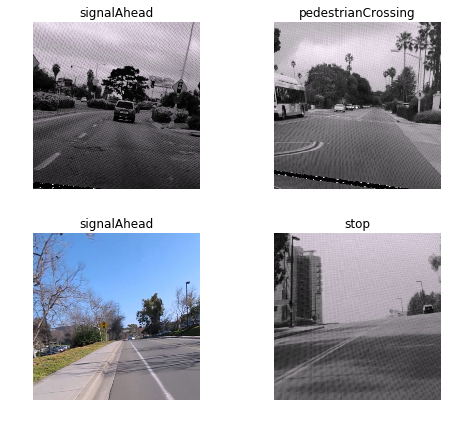

In [153]:
data.show_batch(rows=2, figsize=(7,6))

In [98]:
data.classes

['keepRight', 'pedestrianCrossing', 'signalAhead', 'speedLimit35', 'stop']

In [154]:
learn = cnn_learner(data, models.alexnet, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/mattw/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:05<00:00, 47.9MB/s] 


In [155]:
learn.freeze()

In [156]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


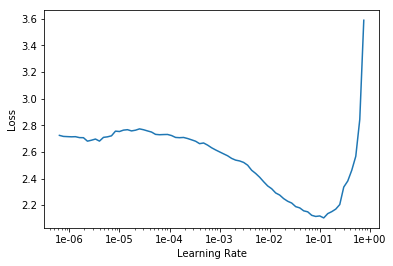

In [157]:
learn.recorder.plot()

In [158]:
lr=1e-2
learn.fit_one_cycle(4, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.519961,0.582219,0.789550,02:01
1,1.080765,0.499872,0.827286,01:53
2,0.832397,0.309902,0.880987,02:09
3,0.694976,0.305197,0.888244,02:15


In [159]:
learn.unfreeze()

In [160]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


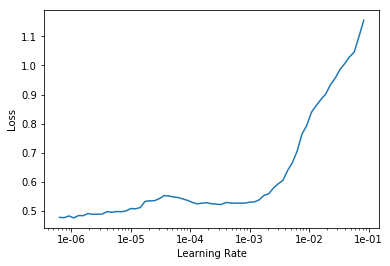

In [161]:
learn.recorder.plot()

In [162]:
lr=2e-4
learn.fit_one_cycle(8, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.578558,0.251404,0.915820,02:02
1,0.512260,0.213852,0.908563,02:07
2,0.462799,0.148859,0.962264,02:06
3,0.375245,0.126517,0.959361,02:10
4,0.324446,0.102192,0.969521,02:20
5,0.288297,0.092546,0.975327,02:14
6,0.263829,0.086147,0.976778,02:18
7,0.254224,0.084771,0.978229,02:09


In [163]:
learn.save("us-signs-alexnet")

In [164]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

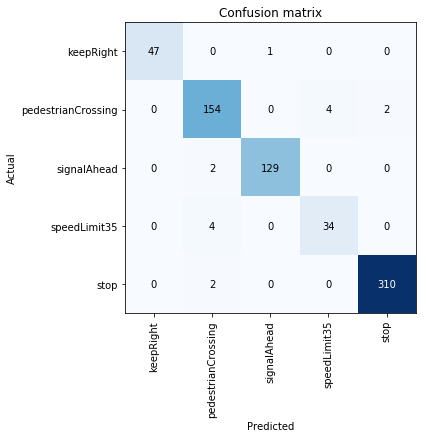

In [165]:
interp.plot_confusion_matrix(figsize=(6,6))

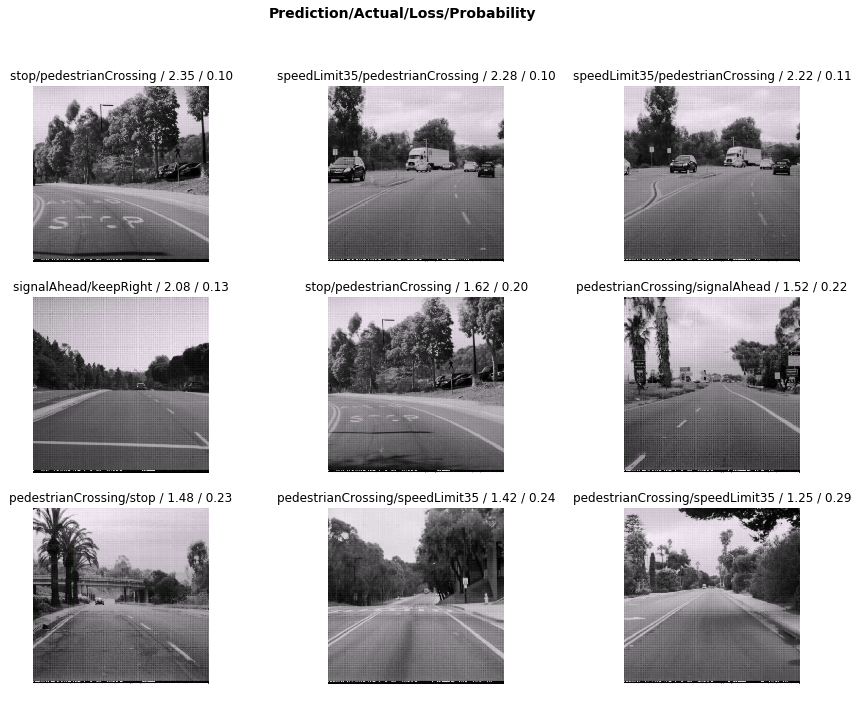

In [166]:
interp.plot_top_losses(9, figsize=(15,11))